In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: xlabel='TV', ylabel='sales'>

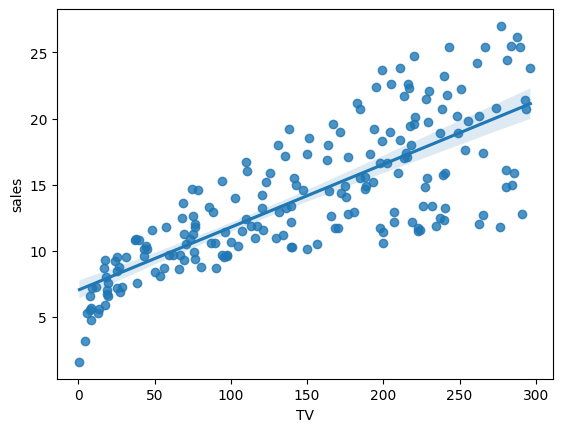

In [3]:
sns.regplot(data=df, x=df['TV'], y=df['sales'])

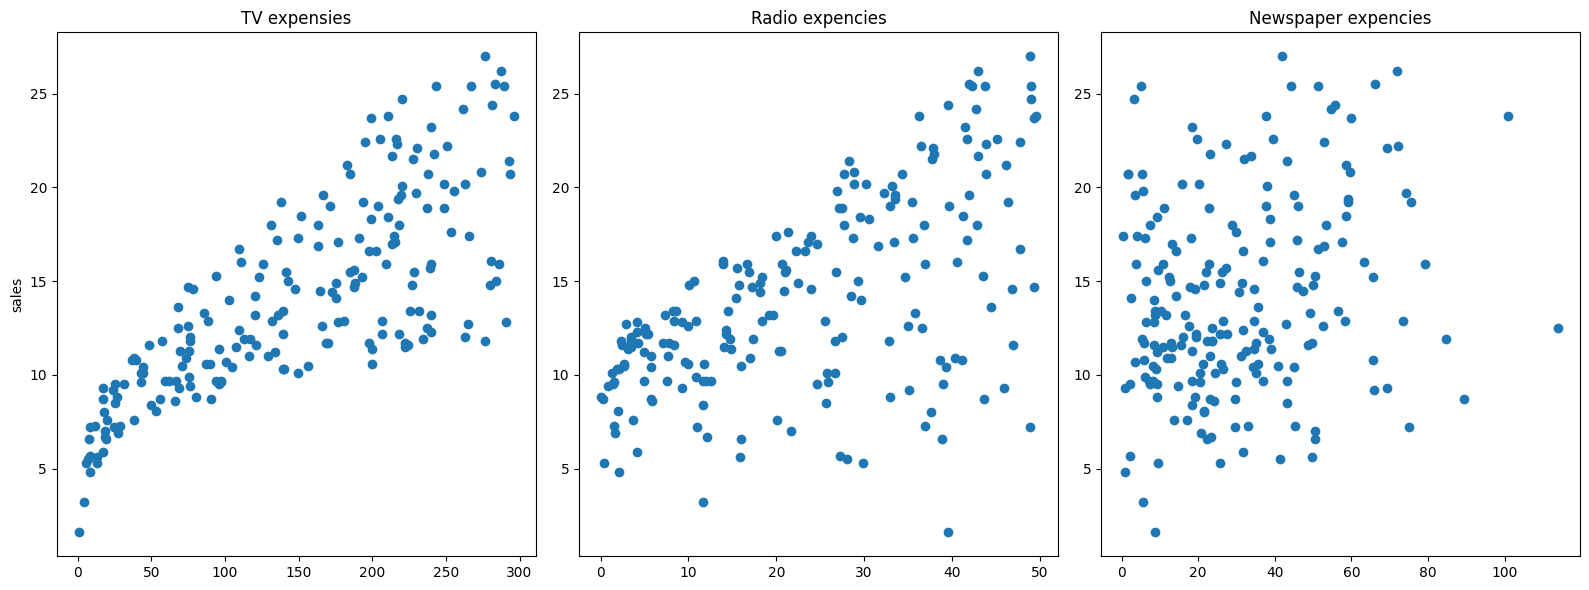

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

ax[0].plot(df['TV'], df['sales'], 'o')
ax[0].set_title('TV expensies')
ax[0].set_ylabel('sales')

ax[1].plot(df['radio'], df['sales'], 'o')
ax[1].set_title('Radio expencies')

ax[2].plot(df['newspaper'], df['sales'], 'o')
ax[2].set_title('Newspaper expencies')

plt.tight_layout()
plt.show()

In [5]:
X = df.drop('sales', axis=1)
y = df['sales']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
test_predictions = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
df['sales'].mean()  # 14.0225

np.float64(14.0225)

In [10]:
mean_absolute_error(y_test, test_predictions)

1.213745773614481

In [11]:
np.sqrt(mean_squared_error(y_test, test_predictions))

np.float64(1.516151937599388)

In [12]:
test_residuals = y_test - test_predictions
# test_residuals

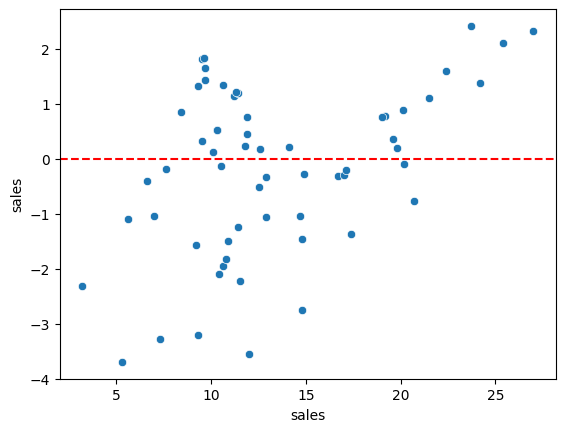

In [13]:
# Residuals plot
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

plt.show()

In [ ]:
# REsiduals distribution
sns.displot(test_residuals, bins=25, kde=True)

plt.show()

In [ ]:
# Normal probability plots
import scipy as sp
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
_=sp.stats.probplot(test_residuals, plot=ax)

In [ ]:
# Learning model using all parameters in case if we satisfy with result
final_model = LinearRegression()
final_model.fit(X, y)

In [ ]:
# VIew final cofficients
final_model.coef_

In [ ]:
y_hat = final_model.predict(X)

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [ ]:
# Savingd model in file
from joblib import dump, load

In [ ]:
dump(final_model, 'final_sales_model.joblib')

In [ ]:
# Load model in project
loaded_model = load('final_sales_model.joblib')

In [ ]:
loaded_model.coef_

In [ ]:
# Data in model same size as for learning
X.shape

In [ ]:
# 49k на рекламу на ТВ, 22k на рекламу по радио и 12k на рекламу в газетах
campaign_df = pd.DataFrame([[149, 22, 12]], columns=['TV', 'radio', 'newspaper'])

In [ ]:
loaded_model.predict(campaign_df)